# TAREA 3 VISUALIZACION DE DATOS CON PYTHON

## Introducción

El objetivo es generar maneras intuitivas de visualizar los datos **importantes** de la base de datos que trabajamos anteriormente en la tarea 2, en nuestro caso es sobre analisis de ingresos anuales segun sus caracteristicas en el senso.

Para este proceso tenemos la siguiente manera de visualizar los datos:

- GRAFICO DE LINEA
- GRAFICO DE AREA [APILABLE, NO APILABLE]
- GRAFICO DE BARRA [HORIZONTAL, VERTICAL]
- GRAFICO DE HISTOGRAMA
- GRAFICO DE CIRCULO O TORTA
- GRAFICO DE CAJA O CAJA Y BIGOTE
- GRAFICO DE DISPERSION [2D]
- GRAFICO DE BURBUJA [3D]
- GRAFICO DE WAFFLE [NO FAIRE, TRADAJDAD]
- GRAFICO DE NUBE DE PALABRAS [WORD_CLOUD]
- GRAFICO DE DISPERSION (SEABORN)
- MAPAS (FOLLIO)


**Nota**: utilizaremos 5 maneras de representar la informacion mas importante sobre este analisis, utilizaremos las librerias **numpy**, **pandas**, **seaborn**, **matplotlib**, **openpyxl**.

***

## importamos las librerias en python

In [13]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import openpyxl as xl

## leemos la base de datos que previamente preparamos.

In [14]:
df = pd.read_csv('../dataframe/df_procesado.csv')

## Usamos las funciones head tail info y describe para tener una idea general de los datos.

In [15]:
df.head()

,Unnamed: 0,age,workclass,representation-by-Census,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,education-num-binned,<=50K,>50K
0,0,39.0,State-gov,0.052210,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,Superior,1,0
1,1,50.0,Self-emp-not-inc,0.056113,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,Superior,1,0
2,2,38.0,Private,0.145245,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,Media,1,0
3,3,53.0,Private,0.158093,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,Media,1,0
4,4,28.0,Private,0.227930,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,Superior,1,0


In [16]:
print(df.head())
print(df.tail())
print(df.info())
print(df.describe())

   Unnamed: 0   age         workclass  representation-by-Census  education  \
0           0  39.0         State-gov                  0.052210  Bachelors   
1           1  50.0  Self-emp-not-inc                  0.056113  Bachelors   
2           2  38.0           Private                  0.145245    HS-grad   
3           3  53.0           Private                  0.158093       11th   
4           4  28.0           Private                  0.227930  Bachelors   

   education-num      marital-status         occupation   relationship   race  \
0             13       Never-married       Adm-clerical  Not-in-family  White   
1             13  Married-civ-spouse    Exec-managerial        Husband  White   
2              9            Divorced  Handlers-cleaners  Not-in-family  White   
3              7  Married-civ-spouse  Handlers-cleaners        Husband  Black   
4             13  Married-civ-spouse     Prof-specialty           Wife  Black   

      sex  capital-gain  capital-loss  hours

## Seleccionamos el estilo que queremos para lo graficos con la libreria mpl

In [17]:
print(plt.style.available)
mpl.style.use(['ggplot']) #seleccionamos el estilo "ggplot"

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


## Para el primer analisis seccionamos la tabla age, que tiene las edades de cada persona registrada en el analisis

filtramos los datos age y <=50k que nos serviran para saber la edad y si esta o no con un sueldo anual inferior o igual a 50k dolares (podemos hacer esto porque el <=50k guarda 1 o 0 si se cumple la condicion)

luego filtramos y separamos en 2 dataframes, quitamos la columna <=50k para que no aparezca en el grafico y presentamos los graficos de caja para compararlos.

C:\Users\Kender\AppData\Local\Temp\ipykernel_20308\1417280029.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grafico_1.drop(['<=50K'], axis=1, inplace=True)
C:\Users\Kender\AppData\Local\Temp\ipykernel_20308\1417280029.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grafico_2.drop(['<=50K'], axis=1, inplace=True)


Text(0, 0.5, 'Años')

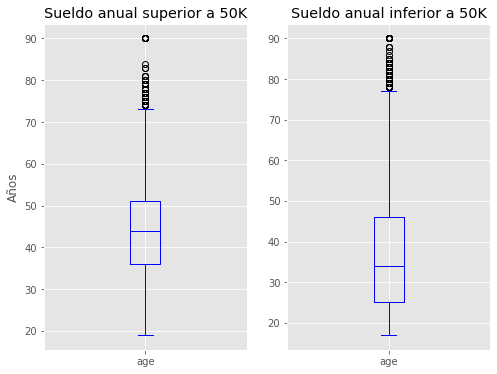

In [18]:
encabezado = ["age", "<=50K"]
df_content = pd.DataFrame(df, columns = encabezado)

grafico_1 = df_content[df_content["<=50K"] == 0]
grafico_2 = df_content[df_content["<=50K"] == 1]

grafico_1.drop(['<=50K'], axis=1, inplace=True)
grafico_2.drop(['<=50K'], axis=1, inplace=True)

fig = plt.figure() # crear figura

ax0 = fig.add_subplot(1, 2, 1) # agregar subgráfico 1 (1 fila, 2 columnas, primer gráfico)
ax1 = fig.add_subplot(1, 2, 2) # agregar subgráfico 2 (1 fila, 2 columnas, segundo gráfico). Ver consejo bajo

# Subgráfico 1: Gráfico de caja
grafico_1.plot(kind='box', color='blue', vert=True, figsize=(8, 6), ax=ax0) # agregar a subgráfico 1
ax0.set_title('Sueldo anual superior a 50K') # agregar título al gráfico


# Subgráfico 2: Gráfico de línea
grafico_2.plot(kind='box', color='blue', vert=True, figsize=(8, 6), ax=ax1) # agregar a subgráfico 2
ax1.set_title ('Sueldo anual inferior a 50K')

ax0.set_ylabel('Años')
#ax1.set_xlabel('a')

## analisis grafico 1
podemos apreciar que el grafico 2 tiene una tendencia hacia valores de edades mas bajos, lo que podria deverse a que las personas de mayor edad tienen mas experiencia para obtener mejores sueldos.

tambien podemos ver que el grafico 1 tiene un promedio mayor que el grafico 2

C:\Users\Kender\AppData\Local\Temp\ipykernel_20308\3341300642.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grafico_1.drop(['<=50K'], axis=1, inplace=True)
C:\Users\Kender\AppData\Local\Temp\ipykernel_20308\3341300642.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grafico_2.drop(['<=50K'], axis=1, inplace=True)


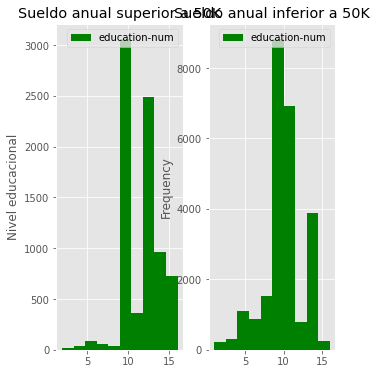

In [19]:
encabezado = ["education-num", "<=50K"]
df_content = pd.DataFrame(df, columns = encabezado)

grafico_1 = df_content[df_content["<=50K"] == 0]
grafico_2 = df_content[df_content["<=50K"] == 1]

grafico_1.drop(['<=50K'], axis=1, inplace=True)
grafico_2.drop(['<=50K'], axis=1, inplace=True)

fig = plt.figure() # crear figura

ax0 = fig.add_subplot(1, 2, 1) # agregar subgráfico 1 (1 fila, 2 columnas, primer gráfico)
ax1 = fig.add_subplot(1, 2, 2) # agregar subgráfico 2 (1 fila, 2 columnas, segundo gráfico). Ver consejo bajo

# Subgráfico 1: Gráfico de caja
#grafico_1.plot(kind='bar', color='green', vert=True, figsize=(8, 6), ax=ax0) # agregar a subgráfico 1

grafico_1.plot(kind='hist',
figsize=(5, 6),
ax=ax0,
color='green',     
)

ax0.set_title('Sueldo anual superior a 50K') # agregar título al gráfico

# Subgráfico 2: Gráfico de línea
#grafico_2.plot(kind='bar', color='green', vert=True, figsize=(8, 6), ax=ax1) # agregar a subgráfico 2

grafico_2.plot(kind='hist',
figsize=(5, 6),
ax=ax1, 
color='green',      
)

ax1.set_title ('Sueldo anual inferior a 50K')

ax0.set_ylabel('Nivel educacional')
#ax1.set_xlabel('a')

plt.show()

C:\Users\Kender\AppData\Local\Temp\ipykernel_20308\4113122034.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grafico_1.drop(['<=50K'], axis=1, inplace=True)
C:\Users\Kender\AppData\Local\Temp\ipykernel_20308\4113122034.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grafico_2.drop(['<=50K'], axis=1, inplace=True)


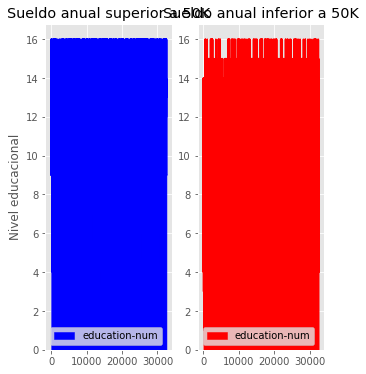

In [20]:
encabezado = ["education-num", "<=50K"]
df_content = pd.DataFrame(df, columns = encabezado)

grafico_1 = df_content[df_content["<=50K"] == 0]
grafico_2 = df_content[df_content["<=50K"] == 1]

grafico_1.drop(['<=50K'], axis=1, inplace=True)
grafico_2.drop(['<=50K'], axis=1, inplace=True)

fig = plt.figure() # crear figura

ax0 = fig.add_subplot(1, 2, 1) # agregar subgráfico 1 (1 fila, 2 columnas, primer gráfico)
ax1 = fig.add_subplot(1, 2, 2) # agregar subgráfico 2 (1 fila, 2 columnas, segundo gráfico). Ver consejo bajo

# Subgráfico 1: Gráfico de caja
#grafico_1.plot(kind='bar', color='green', vert=True, figsize=(8, 6), ax=ax0) # agregar a subgráfico 1

grafico_1.plot(kind='area',
figsize=(5, 6),
ax=ax0,
color='blue',     
)

ax0.set_title('Sueldo anual superior a 50K') # agregar título al gráfico

# Subgráfico 2: Gráfico de línea
#grafico_2.plot(kind='bar', color='green', vert=True, figsize=(8, 6), ax=ax1) # agregar a subgráfico 2

grafico_2.plot(kind='area',
figsize=(5, 6),
ax=ax1, 
color='red',      
)

ax1.set_title ('Sueldo anual inferior a 50K')

ax0.set_ylabel('Nivel educacional')
#ax1.set_xlabel('a')

plt.show()

In [21]:
# usar el método sum() para obtener la población total por año
df_total = pd.DataFrame( df['education-num'].sum(axis=0) )

# cambiar los años al tipo float (útil para la regresión más adelante)
df_total.index = map(float, df_total.index)

# restablecer el índice para volver a colocarlo como una columna en el marco de datos df_total
df_total.reset_index(inplace=True)

# renonmbrar las columnas
df_total.columns = ['age', 'education-num']

# mostrar el dataframe final
df_total.head()

sns.regplot(x='age', y='education-num', data=df)

ValueError: DataFrame constructor not properly called!

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


""
sex
Female
Male


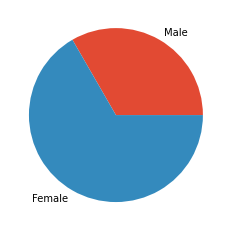

In [28]:
encabezado = ["sex"] #["sex", "<=50K"]
df_content = pd.DataFrame(df, columns = encabezado)

df_content["sex"].unique()
#df_content["sex"].unique()

plt.pie([10,20], labels=df_content["sex"].unique())

df_content["sex"].value_counts()

#["male", "female"]

# agrupar países por continente y aplicar la función sum() 
df_sex = df.groupby('sex', axis=0).sum()

df_sex.head()